<a href="https://colab.research.google.com/github/ibankatesh/ProjectDL/blob/main/Government_Project_Road_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Government Deep Learning Project**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Submitted By
### Bankatesh Choudhary
### PHD Candidate, BIT Mesra (Noida Campus)
### Mail : phdmb10007.21@bitmesra.ac.in
### Ph: +91-9934337346

# Government Project

#### Poor maintenance of roads is a large problem impacting assets worth lakhs of crores. Roads not maintained on time, deteriorate beyond repair and are too expensive to build back. As part of a maintenance system, millions of pictures are uploaded as proof against road maintenance payments made to contractors. However, the process of checking these pictures is largely a manual exercise and requires substantial time and effort.

In order to aid the process of checking these pictures, Client desires to build a deep learning solution which can automatically detect the condition of the road based on the picture provided.
 In this project, we will build a deep learning model which can tell good roads apart from the bad ones.

## Dataset:
●	0 : Poor Roads
●	1 : Good Roads





### This project involves building a deep learning model to classify images of roads into two categories: good and poor.
#### For this exercise, we will be using a Convolutional Neural Network (CNN) model due to its efficiency and accuracy in image classification tasks.

## Step 1: Set Up the Environment
Load the required libraries and packages for building the deep learning model.
Here I am importing Libraries for this Exercise - NumPy, Matplotlib, Tensorflow, Keras and few more as required.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Step 2: Load the Dataset
Since the dataset is divided into folders with indicative names, we can use ImageDataGenerator to load the images from respective directories.

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_directory = '/content/drive/MyDrive/emarg_model/train-2'
train_generator = train_datagen.flow_from_directory(train_directory,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 13226 images belonging to 2 classes.


In [4]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_directory = '/content/drive/MyDrive/emarg_model/val'
validation_generator = validation_datagen.flow_from_directory(validation_directory,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 1511 images belonging to 2 classes.


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/emarg_model/train-2',
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/emarg_model/val',
                                                              target_size=(150, 150),
                                                              batch_size=32,
                                                              class_mode='binary')


Found 13226 images belonging to 2 classes.
Found 1511 images belonging to 2 classes.


## Step 3: Build the Model
Create a convolutional neural network (CNN) model that can detect the condition of the roads.

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

## Step 4: Compile and Train the Model
Compile the model using a suitable optimizer and loss function for binary classification. Train the model using the training data and validate it using the validation data.

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stopping])


Epoch 1/20
414/414 [==============================] - 2997s 7s/step - loss: 0.6872 - accuracy: 0.5761 - val_loss: 0.6404 - val_accuracy: 0.6433
Epoch 2/20
414/414 [==============================] - 75s 180ms/step - loss: 0.6331 - accuracy: 0.6437 - val_loss: 0.6165 - val_accuracy: 0.6612
Epoch 3/20
414/414 [==============================] - 71s 171ms/step - loss: 0.6166 - accuracy: 0.6627 - val_loss: 0.6212 - val_accuracy: 0.6532
Epoch 4/20
414/414 [==============================] - 70s 170ms/step - loss: 0.5868 - accuracy: 0.6853 - val_loss: 0.5672 - val_accuracy: 0.7075
Epoch 5/20
414/414 [==============================] - 70s 169ms/step - loss: 0.5676 - accuracy: 0.7013 - val_loss: 0.5397 - val_accuracy: 0.7280
Epoch 6/20
414/414 [==============================] - 75s 181ms/step - loss: 0.5438 - accuracy: 0.7215 - val_loss: 0.5381 - val_accuracy: 0.7306
Epoch 7/20
414/414 [==============================] - 72s 175ms/step - loss: 0.5221 - accuracy: 0.7395 - val_loss: 0.5091 - val_acc

## Step 5: Evaluate the Model
Evaluate the model's performance using suitable metrics (e.g., accuracy, precision, recall) on the validation set.

In [8]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_accuracy * 100}%")


48/48 [==============================] - 7s 138ms/step - loss: 0.6478 - accuracy: 0.7512
Validation Accuracy: 75.11581778526306%


## Step 6: Visualize the Training Process
Plot the training and validation loss and accuracy to analyze the model's behavior.

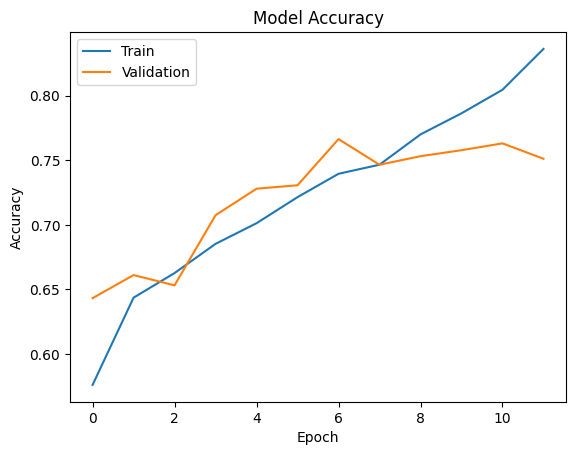

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Step 7: Save the Model
Save the model in the required format (.pkl/.h5).

In [11]:
model.save("finalnhaidatamodel")

In [12]:
# I have trained and evaluated the model and it's stored in a variable named `model`
# Save the model using Keras' save function
model.save('finalnhaidatamodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
from keras.models import load_model

# Load the saved model
model = load_model('finalnhaidatamodel.h5')

# Result & Outcomes

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the saved model
model = load_model('finalnhaidatamodel')

# Load the image you want to classify
image_path = '/content/drive/MyDrive/emarg_model/train-2/0/PE-AR-27661-65_2.jpg'
image = load_img(image_path, target_size=(150, 150))

# Convert the image to a numpy array
image_array = img_to_array(image)

# Scale the pixel values to [0, 1]
image_array /= 255.0

# Expand dimensions to match the model's input shape
image_batch = np.expand_dims(image_array, axis=0)

# Predict the class
predictions = model.predict(image_batch)

# Interpret the prediction as good or poor road quality
if predictions[0] < 0.5:
    print("The road quality is classified as Poor.")
else:
    print("The road quality is classified as Good.")


1/1 [==============================] - 0s 407ms/step
The road quality is classified as Poor.


In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the saved model
model = load_model('finalnhaidatamodel')

# Load the image you want to classify
image_path = '/content/drive/MyDrive/emarg_model/train-2/1/PE-AR-39553-75_2.jpg'
image = load_img(image_path, target_size=(150, 150))

# Convert the image to a numpy array
image_array = img_to_array(image)

# Scale the pixel values to [0, 1]
image_array /= 255.0

# Expand dimensions to match the model's input shape
image_batch = np.expand_dims(image_array, axis=0)

# Predict the class
predictions = model.predict(image_batch)

# Interpret the prediction as good or poor road quality
if predictions[0] < 0.5:
    print("The road quality is classified as Poor.")
else:
    print("The road quality is classified as Good.")

1/1 [==============================] - 0s 107ms/step
The road quality is classified as Poor.


1/1 [==============================] - 0s 67ms/step


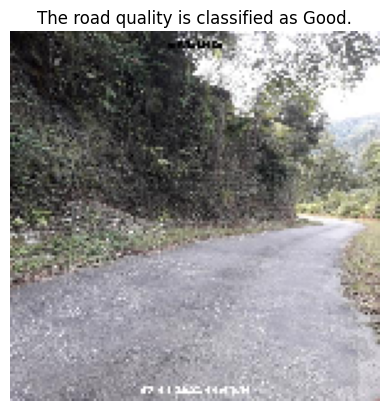

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('finalnhaidatamodel')

# Load the image you want to classify
image_path = '/content/drive/MyDrive/emarg_model/train-2/1/PE-AR-74030-240_2.jpg'
image = load_img(image_path, target_size=(150, 150))

# Convert the image to a numpy array
image_array = img_to_array(image)

# Scale the pixel values to [0, 1]
image_array /= 255.0

# Expand dimensions to match the model's input shape
image_batch = np.expand_dims(image_array, axis=0)

# Predict the class
predictions = model.predict(image_batch)

# Display the image with the predicted result
plt.imshow(image)
if predictions[0] < 0.5:
    plt.title("The road quality is classified as Poor.")
else:
    plt.title("The road quality is classified as Good.")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 113ms/step


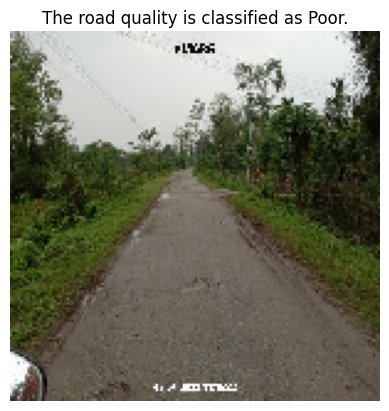

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('finalnhaidatamodel')

# Load the image you want to classify
image_path = '/content/drive/MyDrive/emarg_model/train-2/0/PE-AR-39552-268_2.jpg'
image = load_img(image_path, target_size=(150, 150))

# Convert the image to a numpy array
image_array = img_to_array(image)

# Scale the pixel values to [0, 1]
image_array /= 255.0

# Expand dimensions to match the model's input shape
image_batch = np.expand_dims(image_array, axis=0)

# Predict the class
predictions = model.predict(image_batch)

# Display the image with the predicted result
plt.imshow(image)
if predictions[0] < 0.5:
    plt.title("The road quality is classified as Poor.")
else:
    plt.title("The road quality is classified as Good.")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 99ms/step


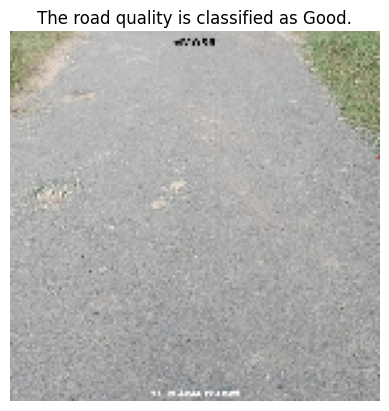

In [23]:
from keras.models import load_model

# Load the saved model
model = load_model('finalnhaidatamodel.h5')

# Load the image you want to classify
image_path = '/content/drive/MyDrive/emarg_model/val/1/PE-BR-42418-13_2.jpg'
image = load_img(image_path, target_size=(150, 150))

# Convert the image to a numpy array
image_array = img_to_array(image)

# Scale the pixel values to [0, 1]
image_array /= 255.0

# Expand dimensions to match the model's input shape
image_batch = np.expand_dims(image_array, axis=0)

# Predict the class
predictions = model.predict(image_batch)

# Display the image with the predicted result
plt.imshow(image)
if predictions[0] < 0.5:
    plt.title("The road quality is classified as Poor.")
else:
    plt.title("The road quality is classified as Good.")
plt.axis('off')
plt.show()